In [1]:
library(edgeR)
library(ggplot2)

Loading required package: limma



In [2]:
expression <- read.csv('data/validate_layers/expression.csv', header=TRUE, row.names=1)
head(expression)

,human_759_L1,human_j12_L1,human_j3_L1,human_j4_L1,human_j6_L1,human_759_L2,human_j12_L2,human_j3_L2,human_j4_L2,human_j6_L2,⋯,X151509_WM,X151510_WM,X151669_WM,X151670_WM,X151671_WM,X151672_WM,X151673_WM,X151674_WM,X151675_WM,X151676_WM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DUSP18,0.008,0.03927492,0.06363636,0.02100840,0.014925373,0.017241379,0.12571429,0.18367347,0.02564103,0.09174312,⋯,0.00000,0.005586592,0.01415094,0.000000000,0.004576659,0.002570694,0.012,0.011494253,0.007911392,0.007707129
ANGPTL4,0.008,0.17522659,0.01818182,0.04201681,0.052238806,0.004926108,0.34857143,0.05102041,0.02991453,0.08256881,⋯,0.06250,0.055865922,0.03773585,0.040935673,0.013729977,0.015424165,0.126,0.160919540,0.113924051,0.100192678
NUP133,0.088,0.09969789,0.32727273,0.18487395,0.059701493,0.169950739,0.34285714,0.82653061,0.45299145,0.24770642,⋯,0.08125,0.055865922,0.08490566,0.105263158,0.027459954,0.028277635,0.116,0.178981938,0.112341772,0.140655106
SLC6A20,0.006,0.01510574,0.00000000,0.00000000,0.089552239,0.002463054,0.01142857,0.00000000,0.01282051,0.07339450,⋯,0.00000,0.000000000,0.00000000,0.005847953,0.000000000,0.000000000,0.002,0.001642036,0.000000000,0.000000000
FRY,0.220,0.32930514,0.54545455,0.60084034,0.216417910,0.662561576,1.70285714,2.68367347,1.96153846,0.81651376,⋯,0.08750,0.050279330,0.16981132,0.111111111,0.052631579,0.028277635,0.096,0.182266010,0.080696203,0.098265896
CD8A,0.014,0.01812689,0.02727273,0.02100840,0.007462687,0.039408867,0.08571429,0.02040816,0.05982906,0.02752294,⋯,0.00625,0.005586592,0.00000000,0.005847953,0.000000000,0.002570694,0.012,0.016420361,0.004746835,0.007707129


In [3]:
annotation <- read.csv("data/validate_layers/annotation.csv", header=TRUE, row.names=1)
head(annotation)

,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
human_759_L1,L1,human_759,500,1400502,human,1
human_j12_L1,L1,human_j12,331,1168612,human,1
human_j3_L1,L1,human_j3,110,536103,human,1
human_j4_L1,L1,human_j4,238,1038124,human,1
human_j6_L1,L1,human_j6,134,339404,human,1
human_759_L2,L2,human_759,406,1962071,human,2


## Chimp markers

### Prepare the data
Let's filter chimp samples in expression and annotation dataframes

In [4]:
specie_annot <- annotation[annotation$condition == 'chimp',]
head(specie_annot)

,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
chimp_11454_L1,L1,chimp_11454,202,550717,chimp,1
chimp_13309_L1,L1,chimp_13309,201,440678,chimp,1
chimp_j8_L1,L1,chimp_j8,398,1140103,chimp,1
chimp_11454_L2,L2,chimp_11454,167,688654,chimp,2
chimp_13309_L2,L2,chimp_13309,136,575274,chimp,2
chimp_j8_L2,L2,chimp_j8,201,1542094,chimp,2


In [5]:
specie_expr <- expression[, row.names(specie_annot)]
head(specie_expr)

,chimp_11454_L1,chimp_13309_L1,chimp_j8_L1,chimp_11454_L2,chimp_13309_L2,chimp_j8_L2,chimp_11454_L3,chimp_13309_L3,chimp_j11_L3,chimp_j8_L3,⋯,chimp_j11_L5,chimp_j8_L5,chimp_11454_L6,chimp_13309_L6,chimp_j11_L6,chimp_j8_L6,chimp_11454_WM,chimp_13309_WM,chimp_j11_WM,chimp_j8_WM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DUSP18,0.004950495,0.009950249,0.012562814,0.017964072,0.007352941,0.009950249,0.024570025,0.05871886,0.054644809,0.04959786,⋯,0.03281520,0.038585209,0.012173913,0.03703704,0.014411529,0.021951220,0.009174312,0.011976048,0.005630143,0.01120448
ANGPTL4,0.019801980,0.004975124,0.032663317,0.005988024,0.007352941,0.029850746,0.014742015,0.01779359,0.005464481,0.02815013,⋯,0.01381693,0.035369775,0.011304348,0.01178451,0.012009608,0.048780488,0.018348624,0.046407186,0.040277176,0.05602241
NUP133,0.118811881,0.109452736,0.155778894,0.257485030,0.161764706,0.442786070,0.191646192,0.37277580,0.185792350,0.49061662,⋯,0.22625216,0.336012862,0.113913043,0.24074074,0.081665332,0.214634146,0.082568807,0.077844311,0.047639671,0.09523810
SLC6A20,0.019801980,0.004975124,0.015075377,0.000000000,0.022058824,0.014925373,0.008599509,0.03380783,0.000000000,0.02010724,⋯,0.02072539,0.004823151,0.006956522,0.01515152,0.002401922,0.012195122,0.009174312,0.002245509,0.001732352,0.00280112
FRY,0.237623762,0.338308458,0.472361809,0.556886228,0.808823529,1.850746269,0.542997543,1.37099644,0.726775956,2.08310992,⋯,0.72366149,1.305466238,0.290434783,0.84511785,0.271417134,0.851219512,0.165137615,0.297155689,0.124729320,0.30392157
CD8A,0.000000000,0.000000000,0.002512563,0.017964072,0.022058824,0.069651741,0.014742015,0.04181495,0.005464481,0.03753351,⋯,0.03799655,0.045016077,0.016521739,0.01683502,0.010408327,0.007317073,0.000000000,0.008233533,0.004330879,0.00140056


In [6]:
specie_annot$layer <- factor(specie_annot$layer)
specie_annot$sample_id <- factor(specie_annot$sample_id)
head(specie_annot)

,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<fct>,<fct>,<dbl>,<dbl>,<chr>,<int>
chimp_11454_L1,L1,chimp_11454,202,550717,chimp,1
chimp_13309_L1,L1,chimp_13309,201,440678,chimp,1
chimp_j8_L1,L1,chimp_j8,398,1140103,chimp,1
chimp_11454_L2,L2,chimp_11454,167,688654,chimp,2
chimp_13309_L2,L2,chimp_13309,136,575274,chimp,2
chimp_j8_L2,L2,chimp_j8,201,1542094,chimp,2


In [7]:
y <- DGEList(counts=specie_expr, samples=specie_annot)

### Filtering and normalization
Let's check a summary table

In [8]:
summary(specie_annot)

 layer        sample_id  psbulk_cells    psbulk_counts      condition        
 L1:3   chimp_11454:7   Min.   : 109.0   Min.   : 282020   Length:26         
 L2:3   chimp_13309:7   1st Qu.: 201.2   1st Qu.:1168856   Class :character  
 L3:4   chimp_j11  :5   Median : 404.0   Median :1957629   Mode  :character  
 L4:4   chimp_j8   :7   Mean   : 594.2   Mean   :2408664                     
 L5:4                   3rd Qu.: 794.8   3rd Qu.:3002741                     
 L6:4                   Max.   :2309.0   Max.   :8816414                     
 WM:4                                                                        
    layer_c     
 Min.   :1.000  
 1st Qu.:3.000  
 Median :4.000  
 Mean   :4.192  
 3rd Qu.:6.000  
 Max.   :7.000  
                

In [9]:
keep.genes <- filterByExpr(y, group=y$samples$layer, min.count=0.01, min.total.count=1)
table(keep.genes)

keep.genes
FALSE  TRUE 
 7941  7426 

In [10]:
y <- y[keep.genes, , keep=FALSE]

In [11]:
y <- normLibSizes(y)
head(y$samples, n=10L)

,group,lib.size,norm.factors,layer,sample_id,psbulk_cells,psbulk_counts,condition,layer_c
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<int>
chimp_11454_L1,1,1723.094,0.9970531,L1,chimp_11454,202,550717,chimp,1
chimp_13309_L1,1,1509.905,1.0258580,L1,chimp_13309,201,440678,chimp,1
chimp_j8_L1,1,2101.736,1.0316078,L1,chimp_j8,398,1140103,chimp,1
chimp_11454_L2,1,2935.377,1.0156604,L2,chimp_11454,167,688654,chimp,2
chimp_13309_L2,1,2952.809,1.0297067,L2,chimp_13309,136,575274,chimp,2
chimp_j8_L2,1,5916.960,0.9981654,L2,chimp_j8,201,1542094,chimp,2
chimp_11454_L3,1,3109.464,1.0164109,L3,chimp_11454,814,3556521,chimp,3
chimp_13309_L3,1,5570.524,1.0181410,L3,chimp_13309,1124,8816414,chimp,3
chimp_j11_L3,1,4368.421,0.9083706,L3,chimp_j11,183,1147695,chimp,3


In [12]:
summary(y$samples$norm.factors)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9036  0.9944  1.0160  1.0007  1.0246  1.0462 

### Data exploration

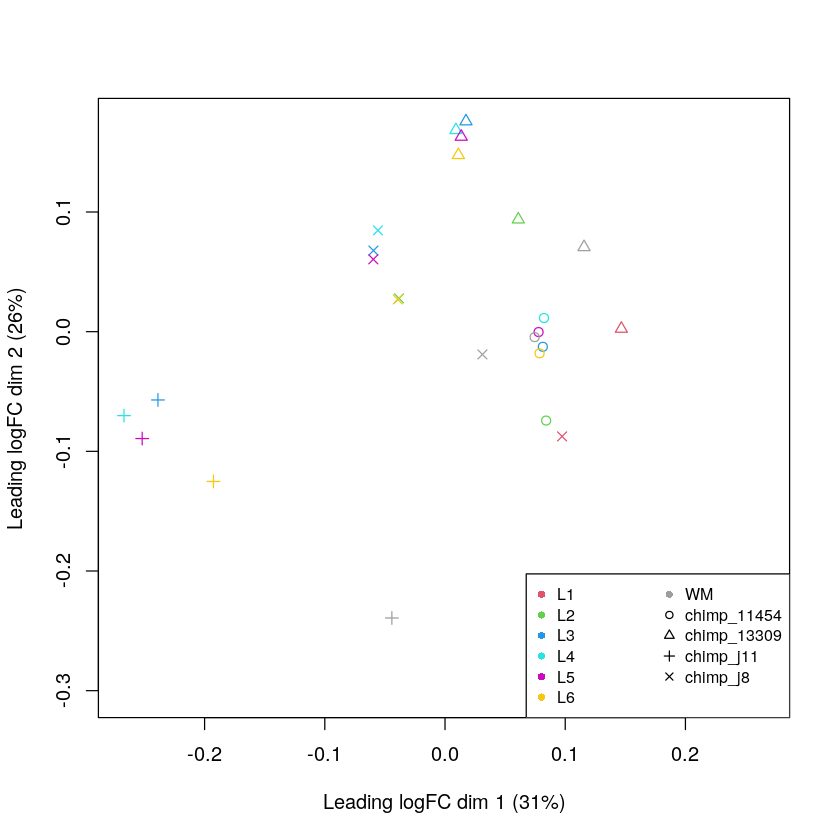

In [13]:
# Plot MDS for chimp markers
layer <- as.factor(y$samples$layer)
sample_id <- y$samples$sample_id
plotMDS(y, pch=c(1:5)[sample_id], col=c(2:8)[layer])
legend("bottomright", legend=c(levels(layer), levels(sample_id)), pch=c(rep(16,7), c(1:5)), col=c(c(2:8), rep(1,5)), cex=0.8, ncol=2)

### Design matrix

In [14]:
design <- model.matrix(~ 0 + layer + sample_id)
colnames(design) <- gsub("sample_id", "", colnames(design))
colnames(design) <- gsub("layer", "", colnames(design))
head(design)

,L1,L2,L3,L4,L5,L6,WM,chimp_13309,chimp_j11,chimp_j8
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,1,0,0
6,0,1,0,0,0,0,0,0,0,1


### Dispersion estimation

In [15]:
y <- estimateDisp(y, design, robust=TRUE)
y$common.dispersion

[1] 9.765625e-05

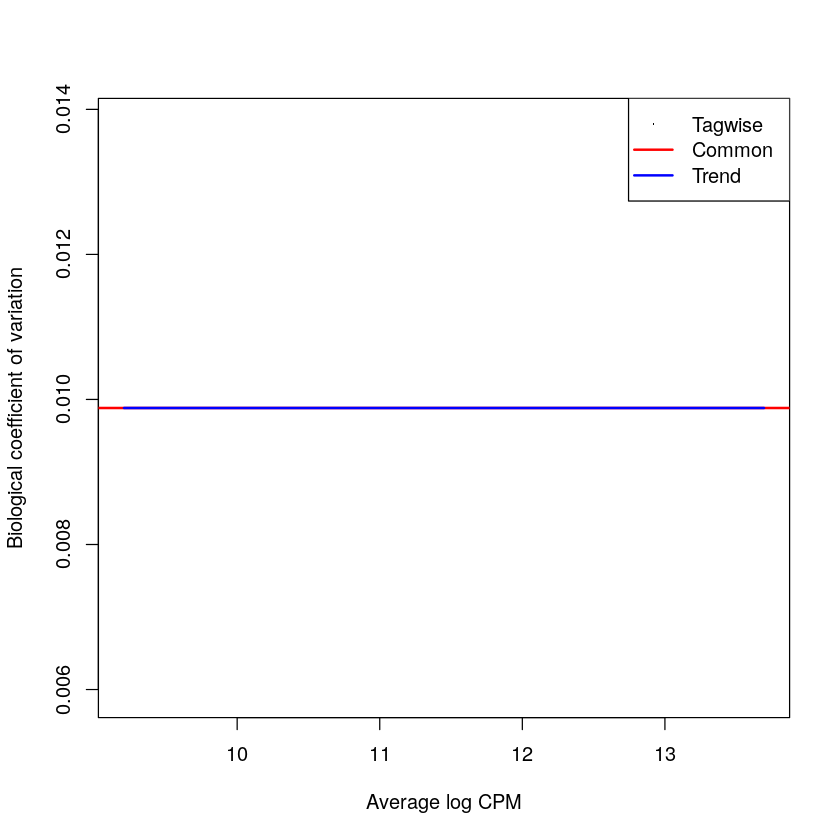

In [16]:
plotBCV(y)

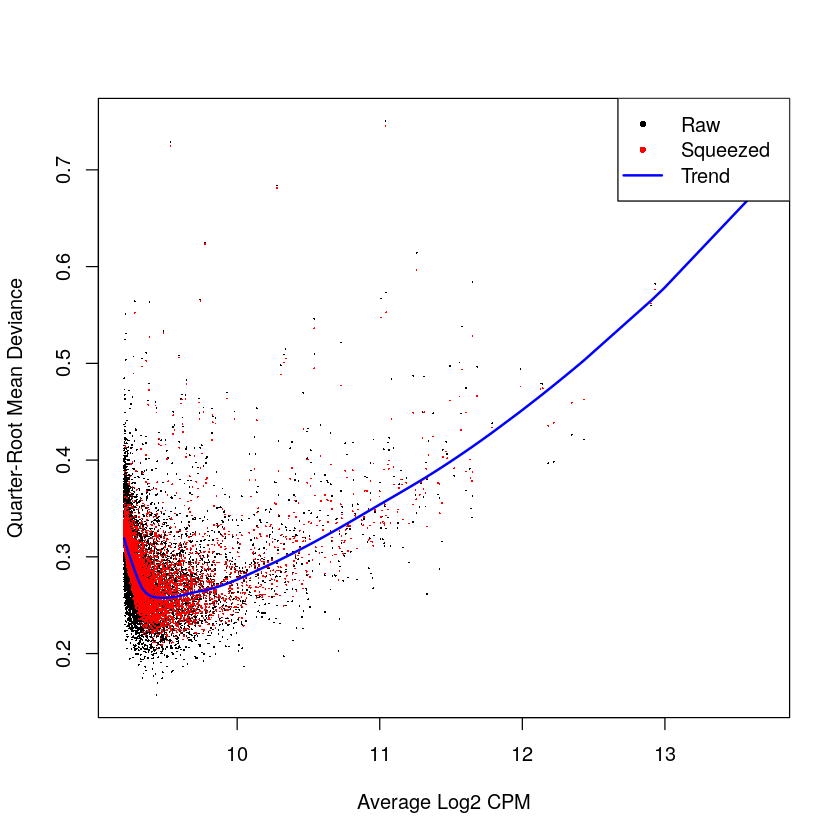

In [17]:
fit <- glmQLFit(y, design, robust=TRUE, legacy=FALSE)
plotQLDisp(fit)

### Marker genes identification
Make a contrast matrix and perform quasi-likelihood F-tests

In [18]:
ncls <- nlevels(layer)
contr <- rbind( matrix(1/(1 - ncls), ncls, ncls), matrix(0, ncol(design)-ncls, ncls) )
diag(contr) <- 1
rownames(contr) <- colnames(design)
colnames(contr) <- levels(layer)
contr
qlf <- list()
for(i in 1:ncls) {
  qlf[[i]] <- glmQLFTest(fit, contrast=contr[,i])
  qlf[[i]]$comparison <- paste0(levels(layer)[i],'_vs_others')
}

,L1,L2,L3,L4,L5,L6,WM
L1,1.0000000,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667
L2,-0.1666667,1.0000000,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667
L3,-0.1666667,-0.1666667,1.0000000,-0.1666667,-0.1666667,-0.1666667,-0.1666667
L4,-0.1666667,-0.1666667,-0.1666667,1.0000000,-0.1666667,-0.1666667,-0.1666667
L5,-0.1666667,-0.1666667,-0.1666667,-0.1666667,1.0000000,-0.1666667,-0.1666667
L6,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,1.0000000,-0.1666667
WM,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,-0.1666667,1.0000000
chimp_13309,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
chimp_j11,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
chimp_j8,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


In [19]:
topTags(qlf[[1]], n=10L)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SNORC,1.6572303,9.444882,411.1172,4.655608e-25,3.457255e-21
VIM,2.2417182,9.752016,387.2090,6.980279e-21,2.591778e-17
COL3A1,2.5581614,9.335920,611.1773,6.222378e-20,1.540246e-16
COL1A1,2.4760363,9.318744,558.3319,1.913202e-18,3.551859e-15
CLEC3B,1.2222691,9.384604,196.0451,1.392780e-17,2.068556e-14
FABP7,1.0991974,10.261882,211.6201,6.124988e-17,7.580693e-14
EEF1D,0.8288165,9.480481,153.1899,7.870888e-17,8.349888e-14
ADIRF,1.2028416,9.344041,180.3572,6.686244e-16,6.206506e-13
COL18A1,1.2343112,9.317317,209.9950,2.029743e-15,1.674763e-12


In [20]:
if (!dir.exists("data/validate_layers/chimpDE/")) {
  dir.create("data/validate_layers/chimpDE/", recursive = TRUE)
}
for(i in 1:ncls) write.csv(qlf[[i]]$table, file=paste0('data/validate_layers/chimpDE/degenes_', levels(layer)[i], '.csv'))

In [21]:
dt <- lapply(lapply(qlf, decideTests), summary)
dt.all <- do.call('cbind', dt)
dt.all

,L1_vs_others,L2_vs_others,L3_vs_others,L4_vs_others,L5_vs_others,L6_vs_others,WM_vs_others
Down,494,158,151,201,85,52,16
NotSig,6357,7017,6894,6837,7137,7265,7371
Up,575,251,381,388,204,109,39


Let's make a heatmap of the top markers

In [22]:
top <- 20
topMarkers <- list()
for (i in 1:ncls) {
  ord <- order(qlf[[i]]$table$PValue, decreasing=FALSE)
  up <- qlf[[i]]$table$logFC[ord] > 0
  topMarkers[[i]] <- rownames(y)[ord[up][1:top]]
}

topMarkers <- unique(unlist(topMarkers))
topMarkers

[1] "SNORC"     "VIM"       "COL3A1"    "COL1A1"    "CLEC3B"    "FABP7"    
  [7] "EEF1D"     "ADIRF"     "COL18A1"   "CLU"       "NCAN"      "FADS2"    
 [13] "METRN"     "IGF2"      "AIF1L"     "COL4A1"    "SCD"       "B2M"      
 [19] "ALDOC"     "CNN3"      "MEIS2"     "PCDH8"     "DACT1"     "MN1"      
 [25] "SYNPR"     "RNF2"      "RGMB"      "IGFBP2"    "SRM"       "AP1S2"    
 [31] "PBX1"      "IGFBP4"    "TMOD1"     "FRZB"      "CPNE8"     "CCK"      
 [37] "LIMCH1"    "SEMA3C"    "LRRC8B"    "IGFBP5"    "CA10"      "CHN1"     
 [43] "PTPRF"     "B4GALT2"   "PAK6"      "CHP1"      "THBS1"     "MEF2C"    
 [49] "TM2D3"     "PCSK2"     "NOL4"      "PPP3CA"    "ATP1A1"    "FGF13"    
 [55] "ACTR3B"    "SPATS2L"   "ARPP19"    "LDB2"      "NRN1"      "PTPRN"    
 [61] "FBXW7"     "NUDT4"     "GABRA5"    "STARD3NL"  "SLC39A10"  "HIVEP2"   
 [67] "NWD2"      "HSPH1"     "CHGB"      "WDR47"     "TMEM159"   "PPP2R2C"  
 [73] "SNCG"      "GABARAPL1" "CHGA"      "ACTR10"    "CRYM"      "TAC1"     
 [79] "PFKP"      "SATB1"     "UBE2QL1"   "SNAP25"    "SLC17A7"   "KLHL1"    
 [85] "VAT1L"     "TTC9B"     "CMAS"      "PLCB1"     "SYNGR3"    "CAMKV"    
 [91] "IGSF21"    "GOT1"      "DNM1"      "SERPINI1"  "TLE4"      "ATP2B4"   
 [97] "NCALD"     "TBR1"      "NPTX1"     "UGP2"      "RASGRP1"   "PCDH17"   
[103] "NTNG2"     "NGEF"      "CPLX3"     "SLIT1"     "CDH2"      "NR4A2"    
[109] "RALYL"     "NUAK1"     "PRDX1"     "GABRG1"    "GFAP"      "SIRT2"    
[115] "NPY"       "SEMA3E"    "APC"       "AHCYL1"    "HEPACAM"   "PLP1"     
[121] "ADD3"      "TMEM178A"  "PTPRZ1"

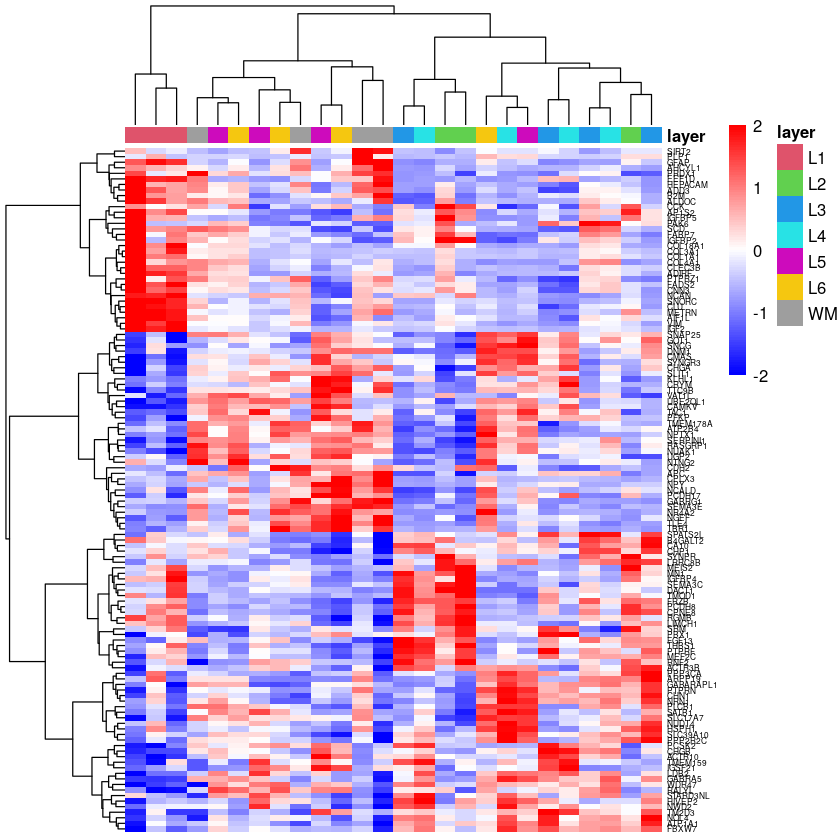

In [23]:
lcpm <- cpm(y, log=TRUE)
annot <- data.frame(layer)
rownames(annot) <- colnames(y)
ann_colors <- list(layer=2:8)
names(ann_colors$layer) <- levels(layer)
pheatmap::pheatmap(lcpm[topMarkers,], breaks=seq(-2,2,length.out=101),
                   color=colorRampPalette(c("blue", "white", "red"))(100), scale="row",
                   ckuster_cols=TRUE, border_color="NA", fontsize_row=5,
                   treeheight_row=70, treeheight_col=70, cuttree_cols=7,
                   clustering_method="ward.D2", show_colnames=FALSE,
                   annotation_col=annot, annotation_colors=ann_colors)

# Session info

In [24]:
sessionInfo()

R version 4.4.0 (2024-04-24)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.5.1 edgeR_4.4.2   limma_3.62.2 

loaded via a namespace (and not attached):
 [1] gtable_0.3.5       jsonlite_1.8.8     dplyr_1.1.4        compiler_4.4.0    
 [5] cra